In [ ]:
!pip install pmdarima


In [ ]:
from pmdarima import auto_arima
import pandas as pd
import datetime
from matplotlib import pyplot
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from math import exp
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
from matplotlib.pylab import rcParams

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")


optData = pd.read_csv('/content/india-carbon-co2-emissions.csv')
df = optData

stepwise_fit = auto_arima(df['co2capita'], trace= True,suppress_warnings=True)
stepwise_fit.summary()





Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-545.652, Time=0.84 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-472.063, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-503.124, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-541.332, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-541.688, Time=0.20 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-546.825, Time=0.50 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-541.981, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=-540.943, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=-546.354, Time=0.70 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=-543.744, Time=0.20 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=-544.431, Time=0.29 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-546.110, Time=0.35 sec

Best model:  ARIMA(2,2,1)(0,0,0)[0]          
Total fit time: 3.590 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  119
Model:               SARIMAX(2, 2, 1)   Log Likelihood                 277.413
Date:                Wed, 12 Mar 2025   AIC                           -546.825
Time:                        13:36:37   BIC                           -535.777
Sample:                             0   HQIC                          -542.340
                                - 119                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4303      0.098     -4.413      0.000      -0.621      -0.239
ar.L2         -0.3536      0.089     -3.994      0.000      -0.527      -0.180
ma.L1         -0.5445      0.068     -8.021      0.000      -0.678      -0.411
sigma2         0.0005   3.46e-05     14.579      0.000       0.000       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               161.60
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              11.03   Skew:                             0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

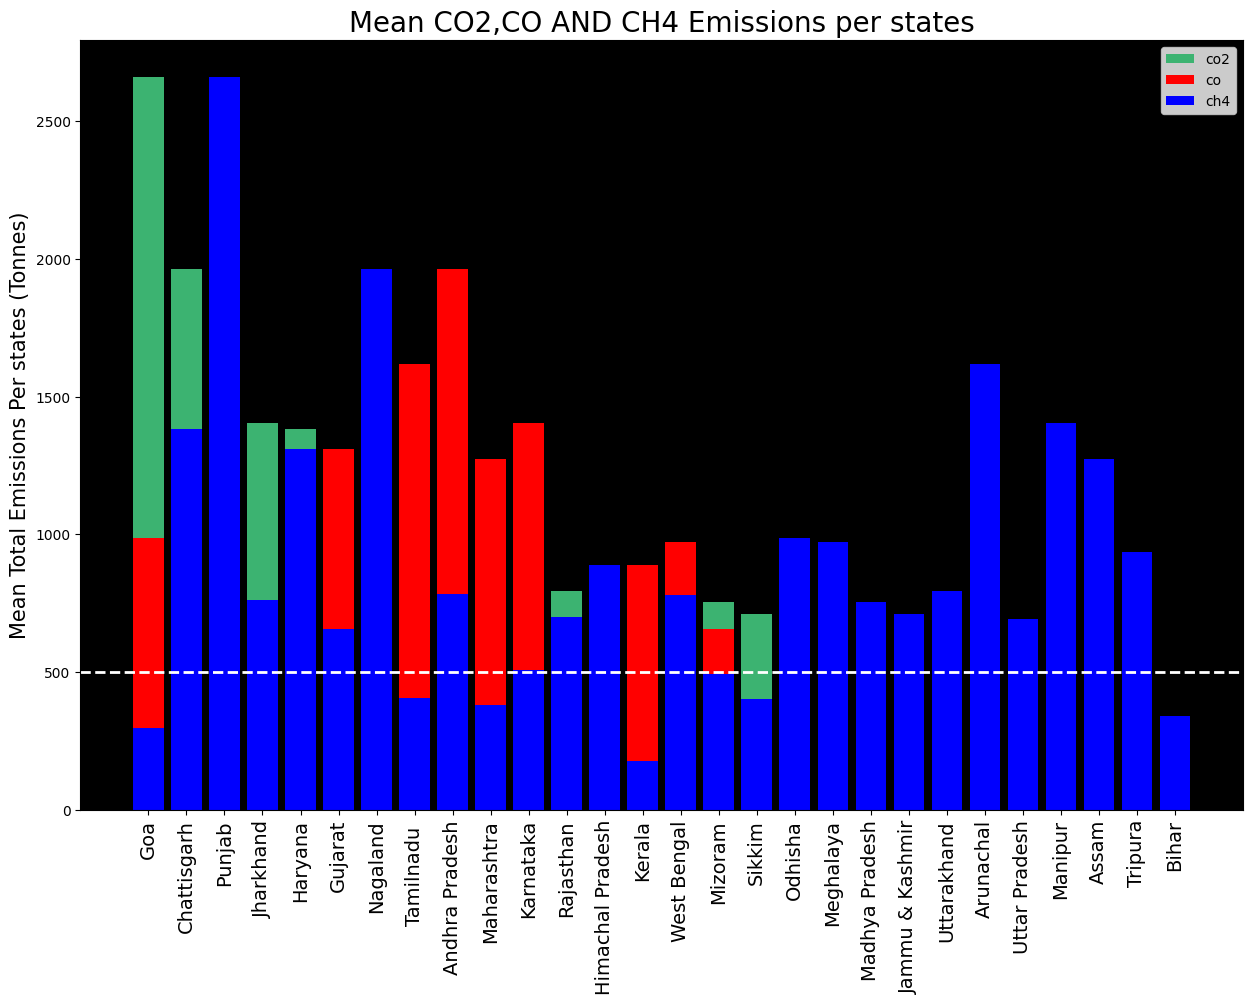

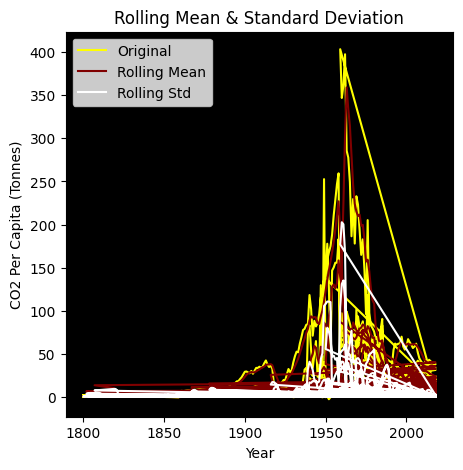

Test Statistic                -1.514843e+01
p-value                        6.851778e-28
#Lags Used                     4.500000e+01
Number of Observations Used    2.048300e+04
dtype: float64


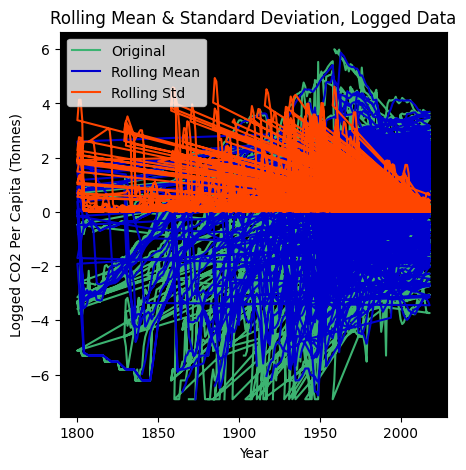

Test Statistic                -1.745515e+01
p-value                        4.629647e-30
#Lags Used                     1.200000e+01
Number of Observations Used    2.051600e+04
dtype: float64


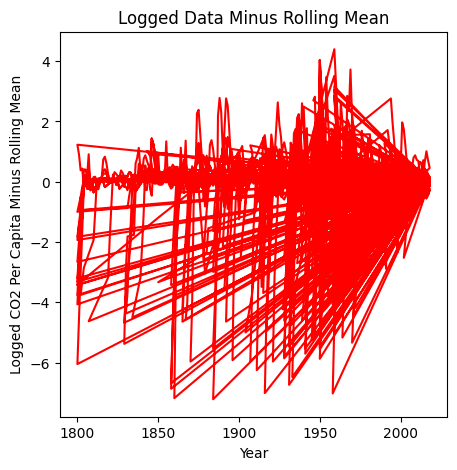

Test Statistic                   -33.596663
p-value                            0.000000
#Lags Used                        21.000000
Number of Observations Used    20280.000000
dtype: float64
                               SARIMAX Results                                
Dep. Variable:              co2capita   No. Observations:                20530
Model:                 ARIMA(2, 2, 1)   Log Likelihood              -25388.766
Date:                Wed, 12 Mar 2025   AIC                          50785.532
Time:                        13:37:31   BIC                          50817.250
Sample:                             0   HQIC                         50795.896
                              - 20530                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.14

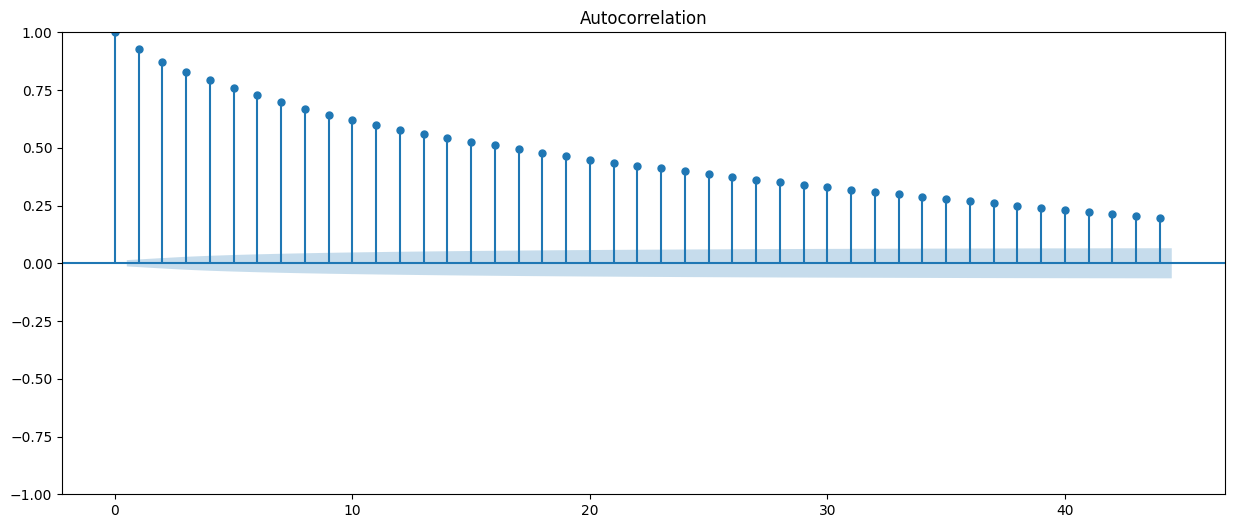

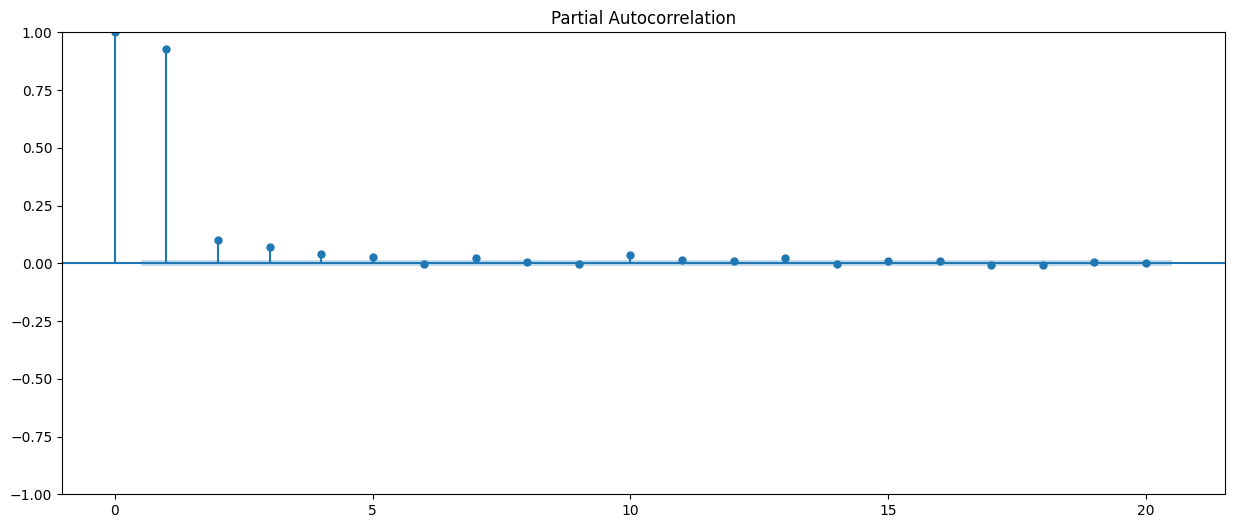

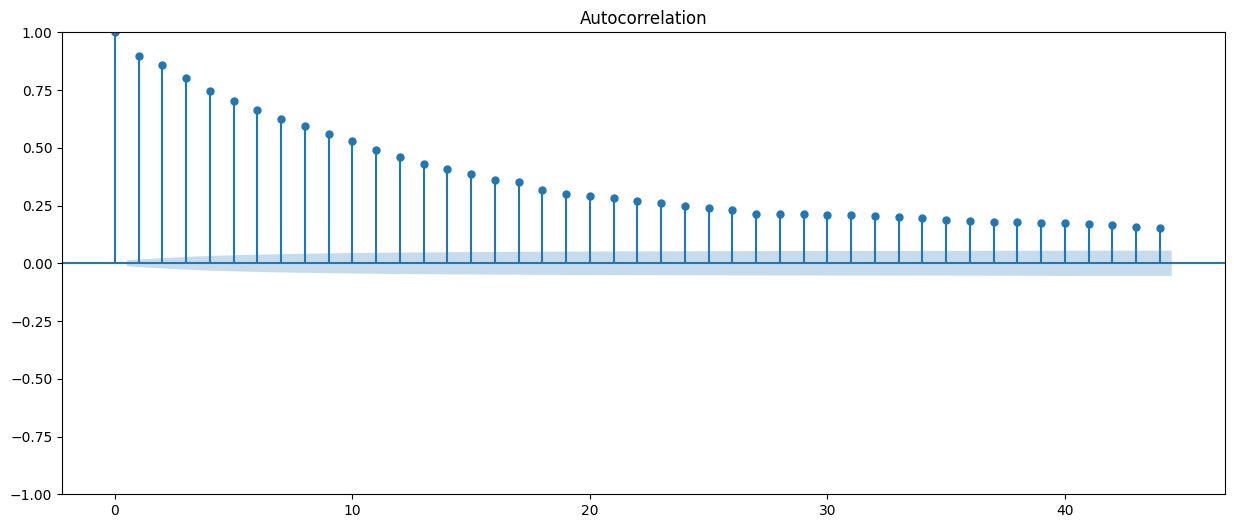

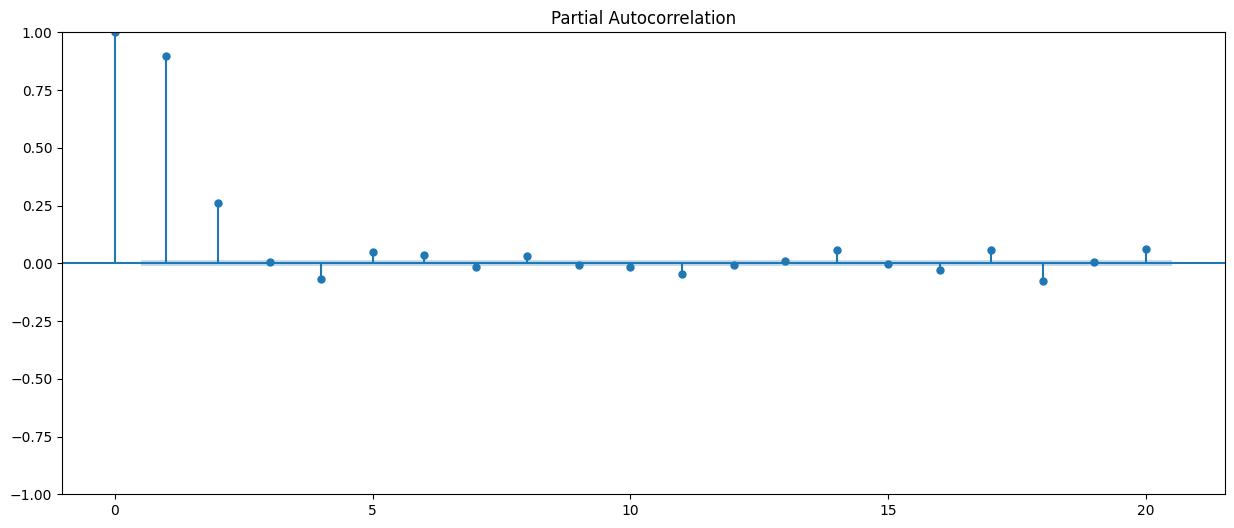

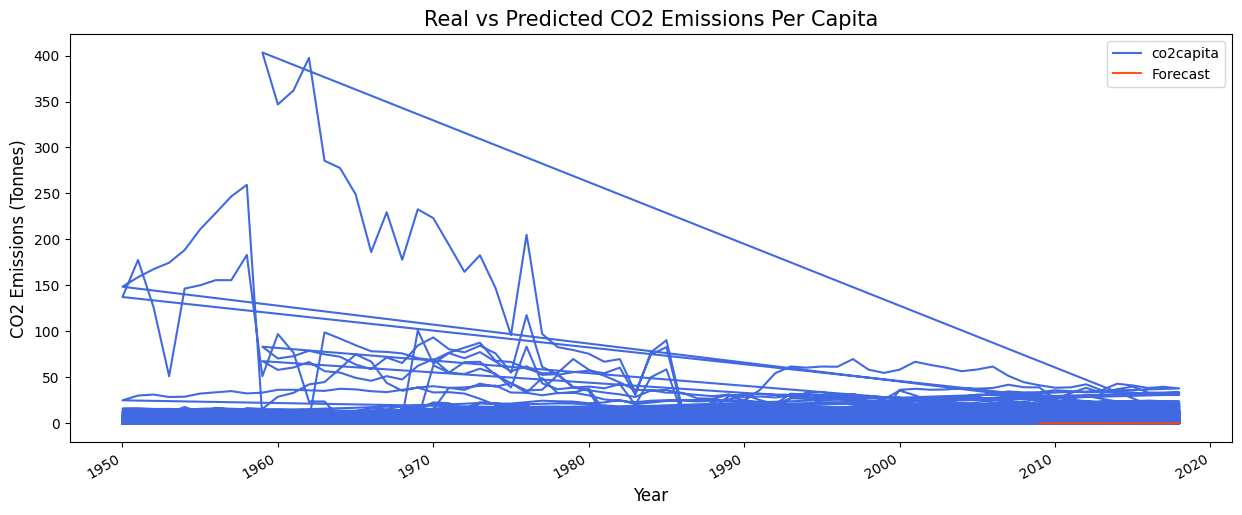

In [ ]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from math import exp
from numpy import log
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.api as sm
from matplotlib.pylab import rcParams

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = 'plotly_white'

# Preferred settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)


data = pd.read_csv('/content/CarbonEmissionIndia.csv')
data2 = pd.read_csv('/content/owid-co2-data.csv')

df = data
df2 = data2

df.head()

# Only include data from 1950 and later
#df = df[df['year']>=1950]

#!df.dropna(axis=1,thresh=8000, inplace=True)

# Drop continents, identified by lacking an ISO code
#df.dropna(axis=0,subset=['iso_code'],inplace=True)

# Drop "World" entries
#df = df[df.country != 'World']

# Observe new df shape
#print(df.shape)










# Visualize top states by CO,C02 and CH4 emissions by states
co2States = df.groupby(['States'])['co2'].mean().sort_values(ascending=False).index[:29]
coStates = df.groupby(['States'])['co'].mean().sort_values(ascending=False).index[:29]
ch4States = df.groupby(['States'])['ch4'].mean().sort_values(ascending=False).index[:29]
height = df.groupby(['States'])['co2'].mean().sort_values(ascending=False)[:29]

x=co2States
y=coStates
z=ch4States


fig, ax = plt.subplots(figsize=(15,10))
ax.set_facecolor("black")
plt.bar(x, height=height, color = 'mediumseagreen')
plt.bar(y, height=height, color = 'red')
plt.bar(z, height=height, color = 'blue')
ax.legend(labels=['co2', 'co','ch4'])

plt.title("Mean CO2,CO AND CH4 Emissions per states", fontsize=20)
plt.ylabel('Mean Total Emissions Per states (Tonnes)', fontsize=15)
for tick in ax.xaxis.get_major_ticks():
    plt.xticks(fontsize=14, rotation='vertical')


# Threshold to indicate countries above 150 mean tonnes
threshold = 500
plt.axhline(y=threshold,linewidth=2, linestyle='dashed', color='white')

plt.show()

# Uncomment below code only to save image
#plt.savefig("images/mean_emissions_per_year_top50")





# Find top 10 emitters per capita

# Create list of top 10 emitters
# top_emit = list(df.groupby(['States'])['total'].mean().sort_values(ascending=False)[:22].index)
# df_top_emit = df.loc[df['States'].isin(top_emit)]
# top10_percapita = list(df_top_emit.groupby(['States'])['total'].mean().sort_values(ascending=False)[:10].index)

# # Plot data
# df_top10 = df.loc[df['States'].isin(top10_percapita)]
# fig, ax = plt.subplots(figsize=(15,6))
# plt.bar(x = top10_percapita,
#         height = df_top10.groupby(['States'])['total'].mean().sort_values(ascending=False),
#        color = 'royalblue')

# plt.title('Top 10  Emitters Per Capita \n 1990-2020', fontsize=15)
# plt.ylabel('Mean Emissions Per Year Per Capita (Tonnes)', fontsize=12)
# plt.xlabel('States', fontsize=12)


#using second csv file which holds data of CO2 emissions in India since 1990
#pre-prediction calculations starts






# Only include india co2_per_capita data
# df2 = df2[df2['year'] >= 1990]
df2 = df2[['year', 'co2_per_capita']]
# Convert year to DateTime object
df2 = df2.rename(columns={'year': 'year2', 'co2_per_capita': 'co2capita'})

# Convert year to index
df2.set_index('year2', inplace=True)

# Observe updated df
df2.head()


# Visualize India's CO2 emissions per capita since 1990,
# including 5-year rolling mean and rolling standard deviation
# df2.index = df2.index.map(str)

roll_mean = df2.rolling(window=5, center=False).mean()
roll_std = df2.rolling(window=5, center=False).std()
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor("black")
plt.plot(df2,color='yellow', label='Original')
plt.plot(roll_mean, color='maroon', label='Rolling Mean')
plt.plot(roll_std, color='white', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita (Tonnes)')
plt.show(block=False)

# Replace infinite values with NaN
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df2.dropna(inplace=True)

# Dickey-Fuller test
test = adfuller(df2['co2capita'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)
#When we make a model for forecasting purposes in time series analysis, we require a stationary time series for better prediction. So the first step to work on modeling is to make a time series stationary. Testing for stationarity is a frequently used activity in autoregressive modeling. We can perform various tests like the KPSS, Phillips–Perron, and Augmented Dickey-Fuller.
#Result : Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.


#to make a prediction model we need to render the data in such a way
#that it dosent exhibit any trend, hence is stationary



# Log transformation to address lack of variance and covariance
# Create new df that contains the logged values of the original one
log_IND = log(df2)

# Visualize logged data, including 5-year rolling mean and standard deviation
roll_mean_log = log_IND.rolling(window=5, center=False).mean()
roll_std_log = log_IND.rolling(window=5, center=False).std()
fig, ax = plt.subplots(figsize=(5,5))
ax.set_facecolor("black")
plt.plot(log_IND,color='mediumseagreen', label='Original')
plt.plot(roll_mean_log, color='mediumblue', label='Rolling Mean')
plt.plot(roll_std_log, color='orangered', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation, Logged Data')
plt.xlabel('Year')
plt.ylabel('Logged CO2 Per Capita (Tonnes)')
plt.show(block=False)

# Dickey-Fuller test
# Replace infinite values with NaN
df2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df2.dropna(inplace=True)

# Replace zero or negative values with a small positive value
df2['co2capita'] = df2['co2capita'].apply(lambda x: 1e-6 if x <= 0 else x)

# Log transformation
log_IND = log(df2)

# Dickey-Fuller test
test = adfuller(log_IND['co2capita'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)

    #as high p-value can be observed again , we need to try different method
    #to achieve stationarity




log_minus_rollmean = log_IND - roll_mean_log

# Drop null values
log_minus_rollmean.dropna(axis=0,inplace=True)
fig, ax = plt.subplots(figsize=(5,5))
#ax.set_facecolor("black")
# Plot data
plt.plot(log_minus_rollmean, color='red')
plt.title('Logged Data Minus Rolling Mean')
plt.xlabel('Year')
plt.ylabel('Logged CO2 Per Capita Minus Rolling Mean')
plt.show(block=False)

# Dickey-Fuller test on logged data minus rolling mean
test = adfuller(log_minus_rollmean['co2capita'][1:-1])
dfoutput = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
print(dfoutput)



#This data looks much more stationary based on its plot and its Dickey-Fuller
# test also yielded a very low p-value, indicating that we can confidently
# reject the null hypothesis that the data is non-stationary.




plot_acf(log_IND[:-1], alpha=.05);

# PACF for logged data
plot_pacf(log_IND[:-1], alpha=.05, lags=20);

# Instantiate ARIMA model for logged data

# Instantiate model 1
mod_log = ARIMA(log_IND[:-1], order=(2,2,1))

# Fit Model
mod_log_fit = mod_log.fit()

# Obeserve summary statistics
print(mod_log_fit.summary())


#to determine best value of parameters we find out which
#parameters gives the least value for ACF and BCF
#library pdarima offers auto determination of order, optimizeOrder.py has been used to determine the best possible order of the dataset

# ACF for original data
plot_acf(df2[:-1], alpha=.05);

# PACF for original data
plot_pacf(df2[:-1], alpha=.05, lags=20);


# Instantiate model
mod221_fit = ARIMA(df2[:-1], order=(2,2,1))

# Fit model
mod221_fit = mod221_fit.fit()

# Observe summary statistics
print(mod221_fit.summary())

# Train-test split
X = log_IND.index
y = log_IND['co2capita']

# Ensure index is unique before splitting
# If there are duplicate years, keep the first entry
log_IND = log_IND[~log_IND.index.duplicated(keep='first')]

# Convert index to datetime with year frequency
log_IND.index = pd.to_datetime(log_IND.index, format='%Y').to_period('Y')

train = log_IND.loc[:pd.Period('2009', freq='Y')]
test = log_IND.loc[pd.Period('2009', freq='Y'):]

X_train, X_test = train.index , test.index
y_train, y_test = train['co2capita'] , test['co2capita']

# ... (rest of the code) ...
mod_logAR = AutoReg(train[2:], lags=2)
mod_logAR_fit = mod_logAR.fit()




